In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,NaN,1.0,2.0,0.0,NaN,0.0,NaN,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,7.0
2,2.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,3.0,2.0,0.0,7.0
3,2.0,2.0,2.0,1.0,0.0,0.0,NaN,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,7.0
4,2.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.0,1.0,0.0,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,70.0
354,2.0,3.0,2.0,0.0,0.0,NaN,0.0,NaN,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.0
355,2.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,0.0,NaN,2.0,0.0,0.0,0.0,2.0,0.0,70.0
356,2.0,NaN,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	33
float64		column 2	31
float64		column 3	33
float64		column 4	28
float64		column 5	41
float64		column 6	37
float64		column 7	36
float64		column 8	36
float64		column 9	38
float64		column 10	30
float64		column 11	29
float64		column 12	37
float64		column 13	36
float64		column 14	42
float64		column 15	36
float64		column 16	28
float64		column 17	35
float64		column 18	32
float64		column 19	47
float64		column 20	34
float64		column 21	24
float64		column 22	41
float64		column 23	47
float64		column 24	35
float64		column 25	34
float64		column 26	35
float64		column 27	35
float64		column 28	48
float64		column 29	31
float64		column 30	37
float64		column 31	38
float64		column 32	32
float64		column 33	38
float64		column 34	43


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,325.000000,327.000000,325.000000,330.000000,317.000000,321.000000,322.000000,322.000000,320.000000,328.000000,...,324.000000,323.000000,323.000000,310.000000,327.000000,321.000000,320.000000,326.000000,320.000000,315.000000
mean,2.073846,1.807339,1.572308,1.360606,0.640379,0.457944,0.155280,0.357143,0.621875,0.539634,...,0.398148,0.495356,0.452012,0.945161,0.452599,0.105919,0.118750,1.852761,0.528125,36.241270
std,0.657877,0.702455,0.901903,1.132670,0.915761,0.964498,0.541821,0.804831,0.987773,0.921183,...,0.846846,0.889453,0.952288,1.126422,0.954510,0.448605,0.499176,0.712380,1.085306,15.463092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.500000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

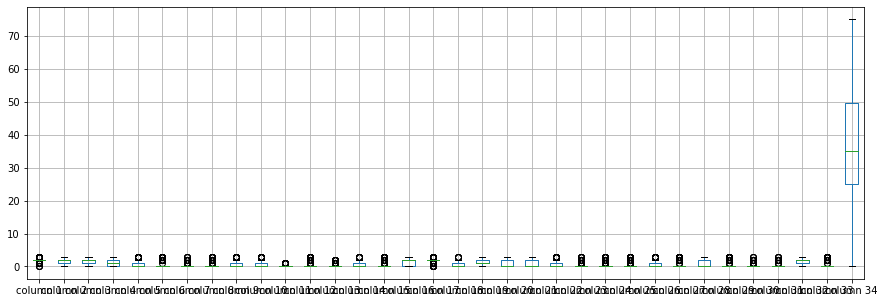

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.073846
column 2      1.807339
column 3      1.572308
column 4      1.360606
column 5      0.640379
column 6      0.457944
column 7      0.155280
column 8      0.357143
column 9      0.621875
column 10     0.539634
column 11     0.124620
column 12     0.398754
column 13     0.149068
column 14     0.566456
column 15     0.344720
column 16     1.375758
column 17     1.959752
column 18     0.518405
column 19     1.282958
column 20     0.657407
column 21     0.958084
column 22     0.615142
column 23     0.286174
column 24     0.362229
column 25     0.398148
column 26     0.495356
column 27     0.452012
column 28     0.945161
column 29     0.452599
column 30     0.105919
column 31     0.118750
column 32     1.852761
column 33     0.528125
column 34    36.241270
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.412837,0.299603,-0.071602,0.002185,0.061138,-0.087087,0.021981,0.170916,0.177457,...,0.029421,0.158636,0.000867,0.067510,0.052798,-0.013735,0.012991,0.148079,0.028407,-0.003622
column 2,0.412837,1.000000,0.356785,-0.086838,-0.005867,-0.062838,-0.092701,-0.108746,0.312724,0.304390,...,-0.114807,0.223157,-0.142565,-0.008841,-0.139084,-0.021710,-0.008490,0.007151,-0.142403,-0.002730
column 3,0.299603,0.356785,1.000000,-0.079333,0.277302,0.339102,-0.229186,0.280549,0.281162,0.208164,...,0.305577,0.339047,0.307995,-0.199294,0.304420,-0.111991,-0.135838,0.150011,0.288834,0.149274
column 4,-0.071602,-0.086838,-0.079333,1.000000,0.242671,0.415654,-0.149063,0.386284,-0.308621,-0.191066,...,0.385507,-0.203697,0.409978,0.040207,0.410405,-0.159573,-0.168150,0.036546,0.414482,0.046527
column 5,0.002185,-0.005867,0.277302,0.242671,1.000000,0.379599,-0.144333,0.379286,-0.089985,-0.023135,...,0.396249,0.014647,0.367067,0.035204,0.394449,-0.143838,-0.159300,0.094926,0.345876,0.093579
column 6,0.061138,-0.062838,0.339102,0.415654,0.379599,1.000000,-0.130454,0.890399,-0.284992,-0.265564,...,0.867172,-0.116117,0.898191,0.110214,0.889068,-0.091870,-0.105092,0.284851,0.904523,0.136577
column 7,-0.087087,-0.092701,-0.229186,-0.149063,-0.144333,-0.130454,1.000000,-0.128019,0.205735,-0.033097,...,-0.105814,-0.166762,-0.136784,0.009317,-0.133851,0.783398,0.845791,-0.084681,-0.124530,-0.368804
column 8,0.021981,-0.108746,0.280549,0.386284,0.379286,0.890399,-0.128019,1.000000,-0.281295,-0.266685,...,0.888575,-0.139544,0.901540,0.122507,0.865749,-0.075740,-0.104966,0.297277,0.913316,0.101204
column 9,0.170916,0.312724,0.281162,-0.308621,-0.089985,-0.284992,0.205735,-0.281295,1.000000,0.661549,...,-0.301194,0.508576,-0.292018,-0.415986,-0.302660,0.248405,0.245014,-0.070243,-0.290007,-0.090531
column 10,0.177457,0.304390,0.208164,-0.191066,-0.023135,-0.265564,-0.033097,-0.266685,0.661549,1.000000,...,-0.272663,0.485067,-0.272843,-0.403656,-0.276022,-0.049201,-0.010717,0.050929,-0.275291,0.058512


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+29,34+29+29,34+29+29+29,34+29+29+29+29,34+29+29+29+29+29,34+29+29+29+29+29+29,34+29+29+29+29+29+29+29,34+29+29+29+29+29+29,34+29+29+29+29+29,34+29+29+29+29,34+29+29+29,34+29+29,34+29,34], vae_layer = False, seed = 29)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 68.33245138688521
Epoch: 1 , loss: 67.95410971208052
Epoch: 2 , loss: 68.09104243191805
Epoch: 3 , loss: 67.59866957231002
Epoch: 4 , loss: 67.74273490905762
Epoch: 5 , loss: 67.33258472789417
Epoch: 6 , loss: 67.29679125005549
Epoch: 7 , loss: 64.72188810868697
Epoch: 8 , loss: 62.85255744240501
Epoch: 9 , loss: 61.99109025435014
Epoch: 10 , loss: 61.62833577936346
Epoch: 11 , loss: 60.89700126647949
Epoch: 12 , loss: 60.35269563848322
Epoch: 13 , loss: 60.04036244479093
Epoch: 14 , loss: 59.873988758433946
Epoch: 15 , loss: 59.6597544930198
Epoch: 16 , loss: 59.33278916098855
Epoch: 17 , loss: 58.894778685136274
Epoch: 18 , loss: 58.75294928117232
Epoch: 19 , loss: 58.79364776611328
Epoch: 20 , loss: 58.90024150501598
Epoch: 21 , loss: 58.298532312566586
Epoch: 22 , loss: 58.05304180492055
Epoch: 23 , loss: 58.24154975197532
Epoch: 24 , loss: 57.76793878728693
Epoch: 25 , loss: 57.968179355968125
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.162852
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     0.666679
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.016271
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [21]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [22]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.117769,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-1.451439,0.0
1,0.450167,0.000000,0.0,0.000000,0.47784,0.000000,-2.987962,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,-2.023927,0.0,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,-1.948359,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.459194,0.0,0.420763,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
354,0.000000,0.000000,0.0,0.000000,0.00000,0.527331,0.000000,0.408071,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
355,0.000000,0.000000,0.0,0.751358,0.00000,0.000000,0.000000,0.000000,0.0,0.322280,...,0.621194,0.0,0.581466,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
356,0.000000,0.795757,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


Calculating NRMSE Value

In [23]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [24]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [25]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(157.81133330811028, 758.0725558942231)

In [26]:
NRMS=numerator/denominator
NRMS


0.208174444624177

In [27]:
new_df.iloc[66,:]

column 1      2.000000
column 2      1.570029
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     1.085502
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.189761
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [28]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,1.000000,1.0,1.000000,1.00000,0.000000,0.117769,0.000000,2.0,2.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.548561,0.0
1,1.450167,1.000000,2.0,0.000000,0.47784,0.000000,0.012038,0.000000,3.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,2.0,-0.023927,2.0,0.000000,7.0
2,2.000000,2.000000,1.0,0.000000,0.00000,0.000000,3.000000,0.000000,2.0,0.000000,...,0.000000,0.0,0.000000,2.0,0.0,3.0,3.000000,2.0,0.000000,7.0
3,2.000000,2.000000,2.0,1.000000,0.00000,0.000000,0.051641,0.000000,2.0,2.000000,...,0.000000,0.0,0.000000,2.0,0.0,2.0,2.000000,2.0,0.000000,7.0
4,2.000000,2.000000,1.0,0.000000,0.00000,0.000000,2.000000,0.000000,2.0,0.000000,...,0.000000,0.0,0.000000,3.0,0.0,2.0,2.000000,2.0,0.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,2.000000,0.0,2.000000,1.00000,0.000000,0.000000,0.459194,0.0,0.420763,...,0.000000,0.0,0.000000,3.0,0.0,0.0,0.000000,3.0,0.000000,70.0
354,2.000000,3.000000,2.0,0.000000,0.00000,0.527331,0.000000,0.408071,3.0,2.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,70.0
355,2.000000,2.000000,2.0,1.751358,0.00000,0.000000,0.000000,0.000000,0.0,0.322280,...,0.621194,0.0,0.581466,2.0,0.0,0.0,0.000000,2.0,0.000000,70.0
356,2.000000,1.795757,0.0,3.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,70.0


In [29]:
imputations[-1].to_excel("DERM_C_10(imp).xlsx", index=False, header=False)